In [9]:
import pandas as pd

In [10]:
melbourne_data = pd.read_csv("melb_data.csv")
melbourne_data = melbourne_data.dropna()

In [11]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [12]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [128]:
# Prepare features
#melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
melbourne_features = ['Rooms', 'Bathroom', 'Lattitude', 'Longtitude', 'BuildingArea', 'Landsize']
X = melbourne_data[melbourne_features]
X.describe()

,Rooms,Bathroom,Lattitude,Longtitude,BuildingArea,Landsize
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,-37.807904,144.990201,141.568645,471.006940
std,0.971079,0.711362,0.075850,0.099165,90.834824,897.449881
min,1.000000,1.000000,-38.164920,144.542370,0.000000,0.000000
25%,2.000000,1.000000,-37.855438,144.926198,91.000000,152.000000
50%,3.000000,1.000000,-37.802250,144.995800,124.000000,373.000000
75%,4.000000,2.000000,-37.758200,145.052700,170.000000,628.000000
max,8.000000,8.000000,-37.457090,145.526350,3112.000000,37000.000000


In [123]:
# Prepare target y
y = melbourne_data.Price
y.describe()

count    6.196000e+03
mean     1.068828e+06
std      6.751564e+05
min      1.310000e+05
25%      6.200000e+05
50%      8.800000e+05
75%      1.325000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [138]:
# Partition test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(f"train size={X_train.size} / test size={X_test.size}")

train size=18588 / test size=18588


In [183]:
# train
from sklearn.tree import DecisionTreeRegressor
melbourne_price_predictor = DecisionTreeRegressor(random_state=5, min_samples_leaf=10)
melbourne_price_predictor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=10, random_state=5)

In [184]:
# test
predictions = melbourne_price_predictor.predict(X_test)
expected = y_test
percent_error = abs((predictions-expected) / expected)
percent_error.describe()

count    3098.000000
mean        0.214389
std         0.300748
min         0.000103
25%         0.072214
50%         0.152891
75%         0.280136
max        12.116140
Name: Price, dtype: float64

In [173]:
# test
melbourne_price_predictor.score(X_test, y_test)

0.5871292148270646

In [185]:
# test
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(expected, predictions)

0.21438919989583666

In [196]:
# Let's try a different model, a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
melbourne_price_predictor_forest = RandomForestRegressor(random_state=5)
melbourne_price_predictor_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=5)

In [197]:
predictions = melbourne_price_predictor_forest.predict(X_test)
mean_absolute_percentage_error(y_test, predictions)

0.1724730864747271

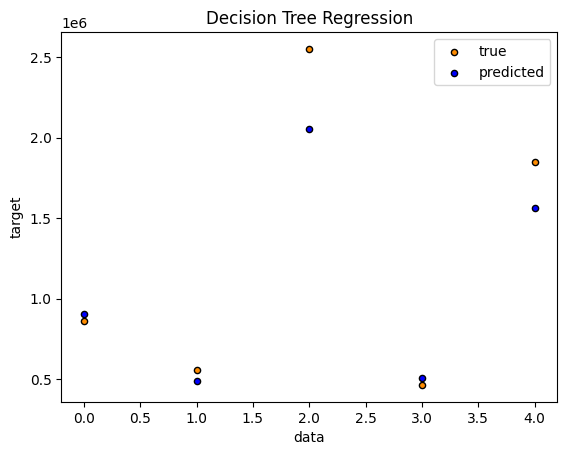

In [182]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(range(len(y_test.head())), y_test.head(), s=20, edgecolor="black", c="darkorange", label="true")
plt.scatter(range(len(y_test.head())), predictions[:len(y_test.head())], s=20, edgecolor="black", c="blue", label="predicted")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

[Text(0.5, 0.875, 'x[4] <= 163.5\nsquared_error = 407993672405.232\nsamples = 3098\nvalue = 1056268.816'),
 Text(0.25, 0.625, 'x[4] <= 94.75\nsquared_error = 164015264046.063\nsamples = 2235\nvalue = 843969.192'),
 Text(0.125, 0.375, 'squared_error = 75402261353.414\nsamples = 852\nvalue = 616574.404'),
 Text(0.375, 0.375, 'squared_error = 167126051354.434\nsamples = 1383\nvalue = 984056.221'),
 Text(0.75, 0.625, 'x[2] <= -37.761\nsquared_error = 620828680819.033\nsamples = 863\nvalue = 1606083.021'),
 Text(0.625, 0.375, 'x[4] <= 256.5\nsquared_error = 629562987276.918\nsamples = 652\nvalue = 1798856.117'),
 Text(0.5, 0.125, 'squared_error = 328623201775.89\nsamples = 472\nvalue = 1575838.559'),
 Text(0.75, 0.125, 'squared_error = 946280052296.894\nsamples = 180\nvalue = 2383657.711'),
 Text(0.875, 0.375, 'squared_error = 124176285497.45\nsamples = 211\nvalue = 1010405.019')]

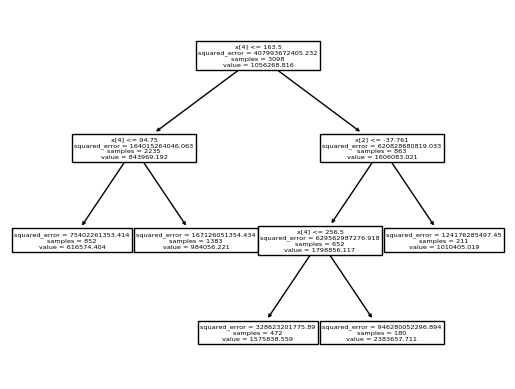

In [176]:
from sklearn.tree import plot_tree
plot_tree(melbourne_price_predictor)